In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv


In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/kaggle/input/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv', low_memory = False)

In [4]:
df.shape

(2622133, 38)

In [5]:
df.sample(5)

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
1295577,1295577,Hudson Valley,Westchester,5907001.0,1099.0,SJRH - Park Care Pavilion,30 to 49,104,M,Other Race,...,NaN,NaN,148946.0,148946.0,NaN,0,N,N,6835.22,2764.18
2247120,2247120,New York City,Manhattan,7002037.0,1471.0,SVCMC-St Vincents Manhattan,70 or Older,100,F,White,...,NaN,NaN,139273.0,NaN,NaN,0,N,Y,9428.93,4853.55
210801,210801,Western NY,Erie,1401014.0,207.0,Buffalo General Hospital,50 to 69,142,F,White,...,Self-Pay,NaN,233691.0,233691.0,217322.0,0,N,Y,7977.49,3195.14
844910,844910,Central NY,Onondaga,3301008.0,636.0,Crouse Hospital,70 or Older,132,M,White,...,Medicare,NaN,172943.0,172943.0,NaN,0,N,N,64425.04,28761.15
819410,819410,Central NY,Onondaga,3301007.0,635.0,University Hospital SUNY Health Science Center,50 to 69,132,F,White,...,NaN,NaN,238526.0,238526.0,NaN,0,N,N,33217.85,17317.29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [7]:
data = df.isnull().sum()

In [8]:
data/ df.shape[0]

index                                  0.000000
Health Service Area                    0.001864
Hospital County                        0.001864
Operating Certificate Number           0.001864
Facility ID                            0.001864
Facility Name                          0.000000
Age Group                              0.000000
Zip Code - 3 digits                    0.001221
Gender                                 0.000000
Race                                   0.000000
Ethnicity                              0.000000
Length of Stay                         0.000000
Type of Admission                      0.000000
Patient Disposition                    0.000039
Discharge Year                         0.000000
CCS Diagnosis Code                     0.000867
CCS Diagnosis Description              0.000867
CCS Procedure Code                     0.000867
CCS Procedure Description              0.000867
APR DRG Code                           0.000000
APR DRG Description                    0

Here we have dropped values which contains higher perecent of null values

In [9]:
h = ["Source of Payment 2", "Source of Payment 3", "Operating Provider License Number", "Other Provider License Number"]

In [10]:
df.drop(columns= h, inplace=True)

By default we can not see all columns. To see all columns we use

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,135.0,INTESTINAL INFECTION,0.0,NO PROC,249,"NON-BACTERIAL GASTROENTERITIS, NAUSEA & VOMITING",6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Medical,Blue Cross,3623.0,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,Not Span/Hispanic,15,Emergency,Home w/ Home Health Services,2010,231.0,OTHER FRACTURE,61.0,OT OR PRCS VES NOT HEAD,912,MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...,25,Multiple Significant Trauma,3,Major,Extreme,Surgical,Insurance Company,216951.0,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,2010,42.0,SECONDARY MALIGNANCY,0.0,NO PROC,240,DIGESTIVE MALIGNANCY,6,Diseases and Disorders of the Digestive System,3,Major,Major,Medical,Medicare,3076.0,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,5,Elective,Home w/ Home Health Services,2010,254.0,REHAB/PROSTH FIT/ADJUST,215.0,OT PHYS THER/REHAB,860,REHABILITATION,23,"Rehabilitation, Aftercare, Other Factors Influ...",2,Moderate,Minor,Medical,Medicare,140796.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,4,Elective,Inpatient Rehabilitation Facility,2010,203.0,OSTEOARTHRITIS,153.0,"HIP REPLACEMENT,TOT/PRT",301,HIP JOINT REPLACEMENT,8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Surgical,Medicare,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,29,Emergency,Home w/ Home Health Services,2010,181.0,OTHR PREGNANCY COMPL,75.0,SMALL BOWEL RESECTON,546,OTHER O.R. PROC FOR OBSTETRIC DIAGNOSES EXCEPT...,14,"Pregnancy, Childbirth and the Puerperium",3,Major,Minor,Surgical,Blue Cross,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,1,Urgent,Home or Self Care,2010,181.0,OTHR PREGNANCY COMPL,128.0,DX DILAT/CURETTAGE -D&C,544,"D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...",14,"Pregnancy, Childbirth and the Puerperium",2,Moderate,Minor,Surgical,Blue Cross,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,4,Emergency,Home or Self Care,2010,178.0,INDUCED ABORTION,126.0,ABORTION (TERM OF PREG),544,"D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...",14,"Pregnancy, Childbirth and the Puerperium",1,Minor,Minor,Surgical,Insurance Company,NaN,0,Y,Y,27775.54,9819.99
2622131,2622131,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,181.0,OTHR PREGNANCY COMPL,127.0,D&C; ASPIR AFT DLV/ABOR,544,"D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...",14,"Pregnancy, Childbirth and the Puerperium",1,Minor,Minor,Surgical

In [13]:
df['Abortion Edit Indicator'].unique()

array(['N', 'Y'], dtype=object)

In [14]:
df['Birth Weight'].unique()

array([   0, 3900, 1100, 3300, 3500, 1600, 4100, 2700, 4200, 8200, 1900,
       5100, 5300, 2800, 3600, 4800, 2400, 4000, 3700, 2100, 2600, 3800,
       3400, 2300, 2900, 2200, 3200, 1300, 1800, 3100, 4700, 4300, 3000,
       4400, 8700, 2500, 1500, 2000, 1400, 6300, 5500, 8600, 7600, 1700,
       4500, 5200, 7400, 1200, 9800, 8400, 9000, 4600, 6200, 5400, 5900,
       7000, 9300, 1000, 9900, 5700, 8100, 7700, 5600, 8300, 8900, 9200,
       7900, 9500, 9700, 6400, 6000, 5000, 8800, 9400, 7800, 5800, 8000,
       8500, 4900, 7200, 7300, 9600, 6900, 6500, 7100, 6700, 9100, 6100,
       7500, 6600, 6800])

In [15]:
df.isnull().sum()

index                                     0
Health Service Area                    4887
Hospital County                        4887
Operating Certificate Number           4887
Facility ID                            4887
Facility Name                             0
Age Group                                 0
Zip Code - 3 digits                    3201
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                     103
Discharge Year                            0
CCS Diagnosis Code                     2273
CCS Diagnosis Description              2273
CCS Procedure Code                     2273
CCS Procedure Description              2273
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description             

In [16]:
df=df.dropna(subset=["Health Service Area"])


Here there were common null values in columns like ' Health Service Area ' , 'Hospital County' , 'Operating Certificate Number' ,  'Facility ID' and 'Attending Provider License Number'. So removing null values from ' Health Service Area ' will remove null values from all these columns.

In [17]:
df.isnull().sum()

index                                     0
Health Service Area                       0
Hospital County                           0
Operating Certificate Number              0
Facility ID                               0
Facility Name                             0
Age Group                                 0
Zip Code - 3 digits                    3200
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                     103
Discharge Year                            0
CCS Diagnosis Code                     2270
CCS Diagnosis Description              2270
CCS Procedure Code                     2270
CCS Procedure Description              2270
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description             

In [18]:
df=df.dropna(subset=["CCS Diagnosis Code", "APR Severity of Illness Description"])


In [19]:
df.isnull().sum()

index                                     0
Health Service Area                       0
Hospital County                           0
Operating Certificate Number              0
Facility ID                               0
Facility Name                             0
Age Group                                 0
Zip Code - 3 digits                    3200
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                     103
Discharge Year                            0
CCS Diagnosis Code                        0
CCS Diagnosis Description                 0
CCS Procedure Code                        0
CCS Procedure Description                 0
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description             

In [20]:
df['Patient Disposition'].value_counts()

Patient Disposition
Home or Self Care                        1779863
Home w/ Home Health Services              321491
Skilled Nursing Home                      245913
Left Against Medical Advice                56810
Expired                                    56067
Short-term Hospital                        47148
Inpatient Rehabilitation Facility          44419
Psychiatric Hospital or Unit of Hosp       15299
Hospice - Medical Facility                  8619
Another Type Not Listed                     8535
Hospice - Home                              8530
Facility w/ Custodial/Supportive Care       7280
Cancer Center or Children's Hospital        5026
Medicare Cert Long Term Care Hospital       3475
Court/Law Enforcement                       3308
Hosp Basd Medicare Approved Swing Bed       2041
Federal Health Care Facility                 718
Medicaid Cert Nursing Facility                46
Critical Access Hospital                      44
Name: count, dtype: int64

In [21]:
df['Patient Disposition'] = df['Patient Disposition'].fillna('Home or Self Care')

In 'Zip Code - 3 digits' fill with value which is highest in every Hospital County.

In [22]:
df['Zip Code - 3 digits'] = df['Zip Code - 3 digits'].fillna(df.groupby('Hospital County')['Zip Code - 3 digits'].transform(lambda x: x.mode().iloc[0]))

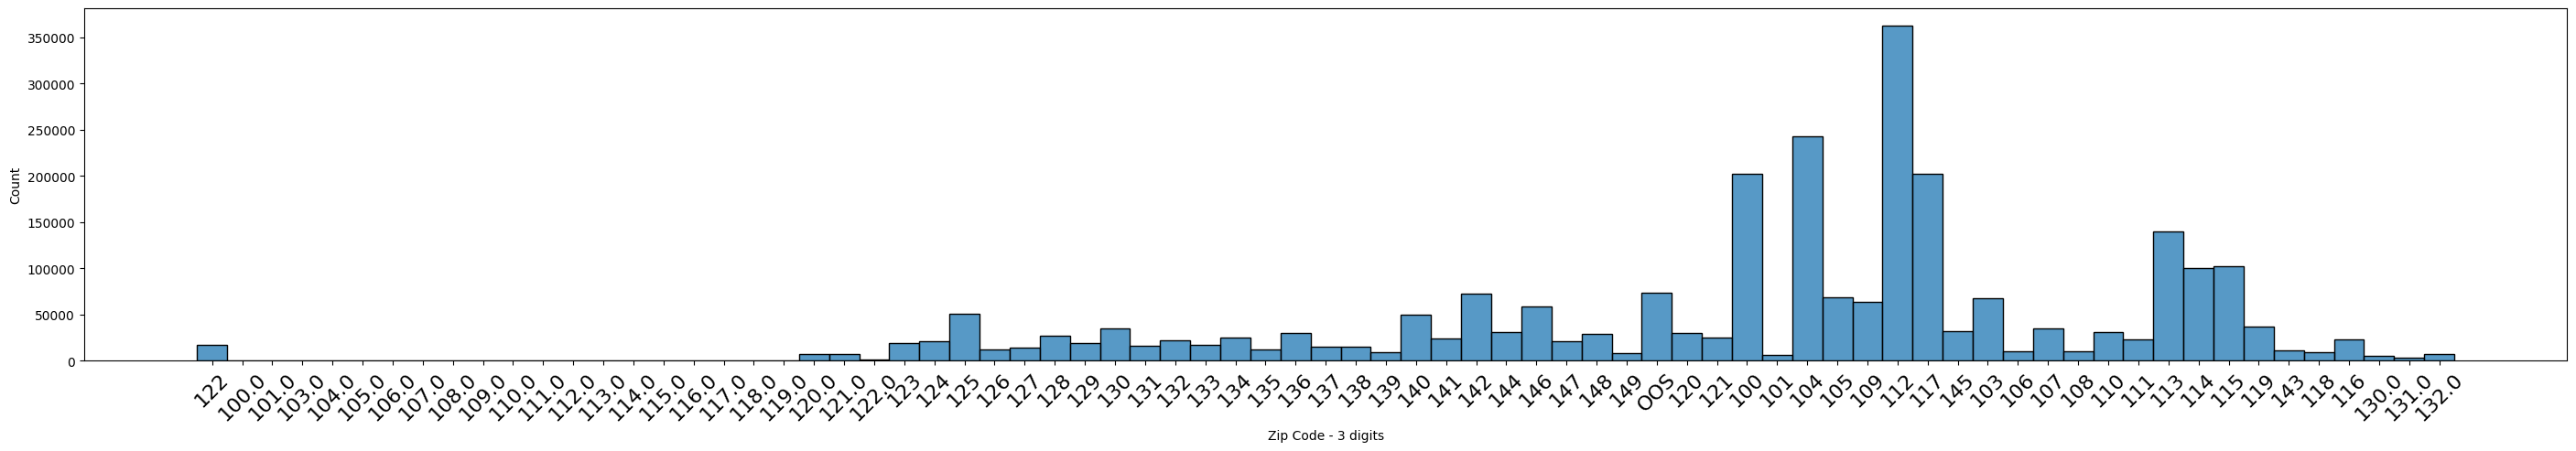

In [23]:
plt.figure(figsize=(35,5))
sns.histplot(data = df["Zip Code - 3 digits"])
plt.xticks(fontsize=16, rotation = 45)
plt.show()

In [24]:
type(df["Zip Code - 3 digits"][8])

str

From histogram we can see that there are 100 and 100.0. So instead we can convert it into three digit numbers so there will be no redundant values.

In [25]:
df["Zip Code - 3 digits"]=df["Zip Code - 3 digits"].str[:3]

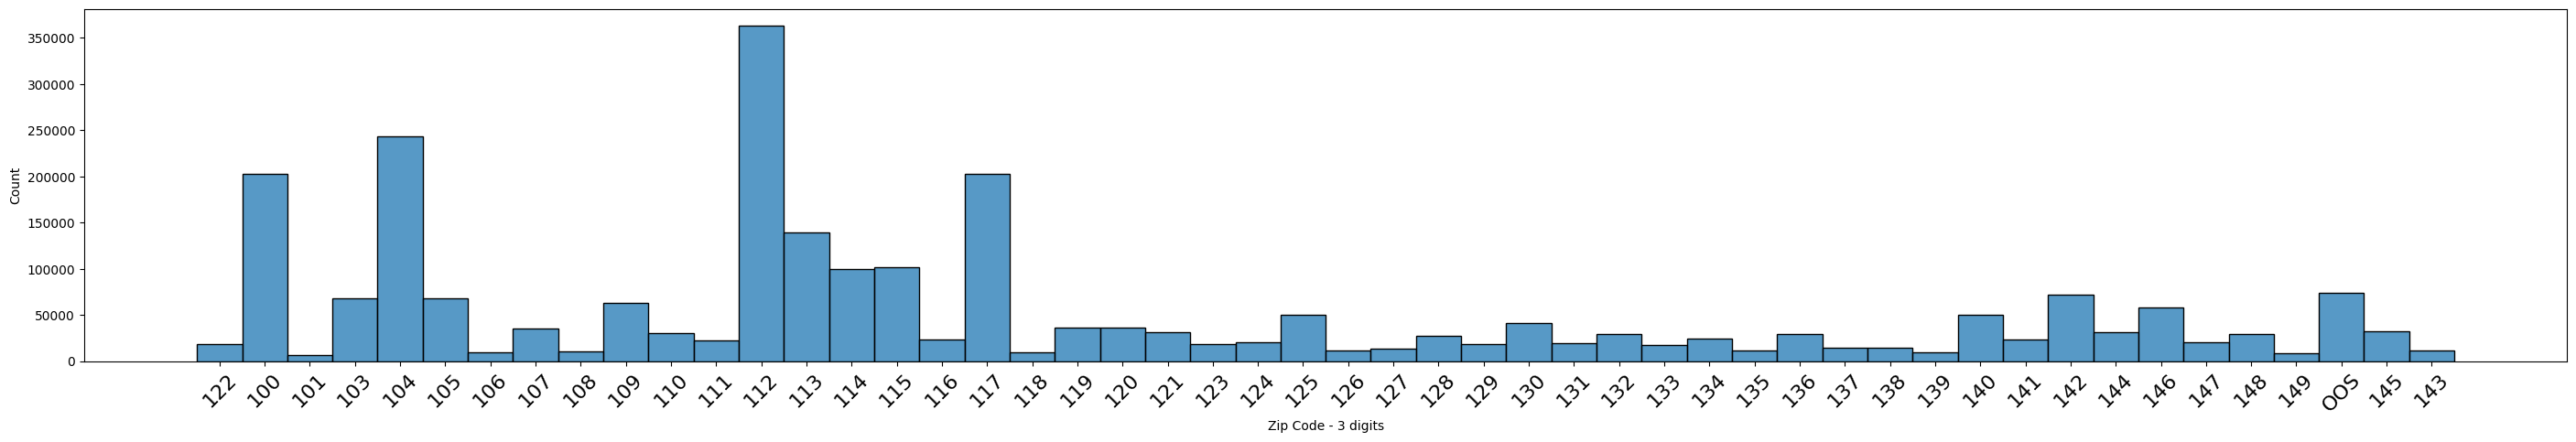

In [26]:
plt.figure(figsize=(35,5))
sns.histplot(data = df["Zip Code - 3 digits"])
plt.xticks(fontsize=16, rotation = 45)
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2614735 entries, 0 to 2617245
Data columns (total 34 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code                   

In [28]:
df.drop(['index', 'Discharge Year', 'CCS Diagnosis Description','CCS Procedure Description','APR DRG Description','APR MDC Description','APR Severity of Illness Description','Abortion Edit Indicator'], axis=1,inplace=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2614735 entries, 0 to 2617245
Data columns (total 26 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                object 
 1   Hospital County                    object 
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Facility Name                      object 
 5   Age Group                          object 
 6   Zip Code - 3 digits                object 
 7   Gender                             object 
 8   Race                               object 
 9   Ethnicity                          object 
 10  Length of Stay                     object 
 11  Type of Admission                  object 
 12  Patient Disposition                object 
 13  CCS Diagnosis Code                 float64
 14  CCS Procedure Code                 float64
 15  APR DRG Code                       int64  
 16  APR MDC Code           

In [30]:
df[['Health Service Area','Hospital County','Facility Name','Age Group','Zip Code - 3 digits','Gender','Race','Ethnicity','Type of Admission','Patient Disposition','CCS Diagnosis Code','APR Risk of Mortality','APR Medical Surgical Description' ,'Source of Payment 1','Emergency Department Indicator']] = df[['Health Service Area','Hospital County','Facility Name','Age Group','Zip Code - 3 digits','Gender','Race','Ethnicity','Type of Admission','Patient Disposition','CCS Diagnosis Code','APR Risk of Mortality','APR Medical Surgical Description' ,'Source of Payment 1','Emergency Department Indicator']].apply(LabelEncoder().fit_transform)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2614735 entries, 0 to 2617245
Data columns (total 26 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                int64  
 1   Hospital County                    int64  
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Facility Name                      int64  
 5   Age Group                          int64  
 6   Zip Code - 3 digits                int64  
 7   Gender                             int64  
 8   Race                               int64  
 9   Ethnicity                          int64  
 10  Length of Stay                     object 
 11  Type of Admission                  int64  
 12  Patient Disposition                int64  
 13  CCS Diagnosis Code                 int64  
 14  CCS Procedure Code                 float64
 15  APR DRG Code                       int64  
 16  APR MDC Code           

In [32]:
type(df['Length of Stay'][0])

str

In [33]:
df['Length of Stay'].unique()

array(['1', '15', '3', '5', '4', '2', '9', '120 +', '13', '18', '8', '7',
       '6', '11', '17', '25', '16', '47', '20', '37', '12', '19', '27',
       '10', '31', '14', '22', '29', '87', '103', '109', '85', '30', '26',
       '44', '21', '36', '72', '89', '76', '49', '98', '105', '69', '45',
       '32', '57', '24', '39', '81', '33', '28', '23', '77', '88', '63',
       '55', '41', '61', '53', '38', '51', '40', '35', '59', '46', '50',
       '92', '64', '34', '73', '60', '67', '68', '97', '80', '82', '71',
       '95', '113', '118', '54', '91', '100', '115', '90', '42', '108',
       '58', '70', '65', '43', '66', '94', '48', '75', '112', '52', '78',
       '62', '106', '84', '107', '93', '104', '56', '117', '79', '116',
       '83', '74', '96', '86', '114', '110', '99', '102', '101', '119',
       '111'], dtype=object)

In [34]:
df['Length of Stay'] = df['Length of Stay'].str.replace('120 +', '120')

In [35]:
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

In [36]:
df

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,0,0,101000.0,1.0,2,1,21,0,3,0,1,1,7,123,0.0,249,6,1,2,0,0,3623.0,0,1,4476.23,1672.65
1,0,0,101000.0,1.0,2,3,21,1,3,0,15,1,8,216,61.0,912,25,3,0,1,2,216951.0,0,1,148612.34,51414.70
2,0,0,101000.0,1.0,2,4,21,1,3,0,3,1,8,41,0.0,240,6,3,1,0,4,3076.0,0,0,16561.99,4032.49
3,0,0,101000.0,1.0,2,4,21,0,3,0,5,0,8,239,215.0,860,23,2,2,0,4,140796.0,0,0,13593.51,4947.81
4,0,0,101000.0,1.0,2,4,21,0,3,0,4,0,12,188,153.0,301,8,1,2,1,4,170254.0,0,0,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617241,1,31,3301008.0,9059.0,42,2,47,0,3,0,30,0,7,256,218.0,772,20,2,2,0,3,161633.0,0,0,24363.22,10878.72
2617242,1,31,3301008.0,9059.0,42,1,48,0,3,0,31,0,7,255,218.0,772,20,2,2,0,3,169629.0,0,0,22463.33,9822.01
2617243,1,31,3301008.0,9059.0,42,2,48,1,3,0,36,0,7,255,219.0,772,20,2,2,0,3,169629.0,0,0,25967.78,11466.50
2617244,1,31,3301008.0,9059.0,42,2,48,0,3,0,31,0,7,255,219.0,772,20,2,2,0,3,169629.0,0,0,21571.25,9462.02


<Axes: >

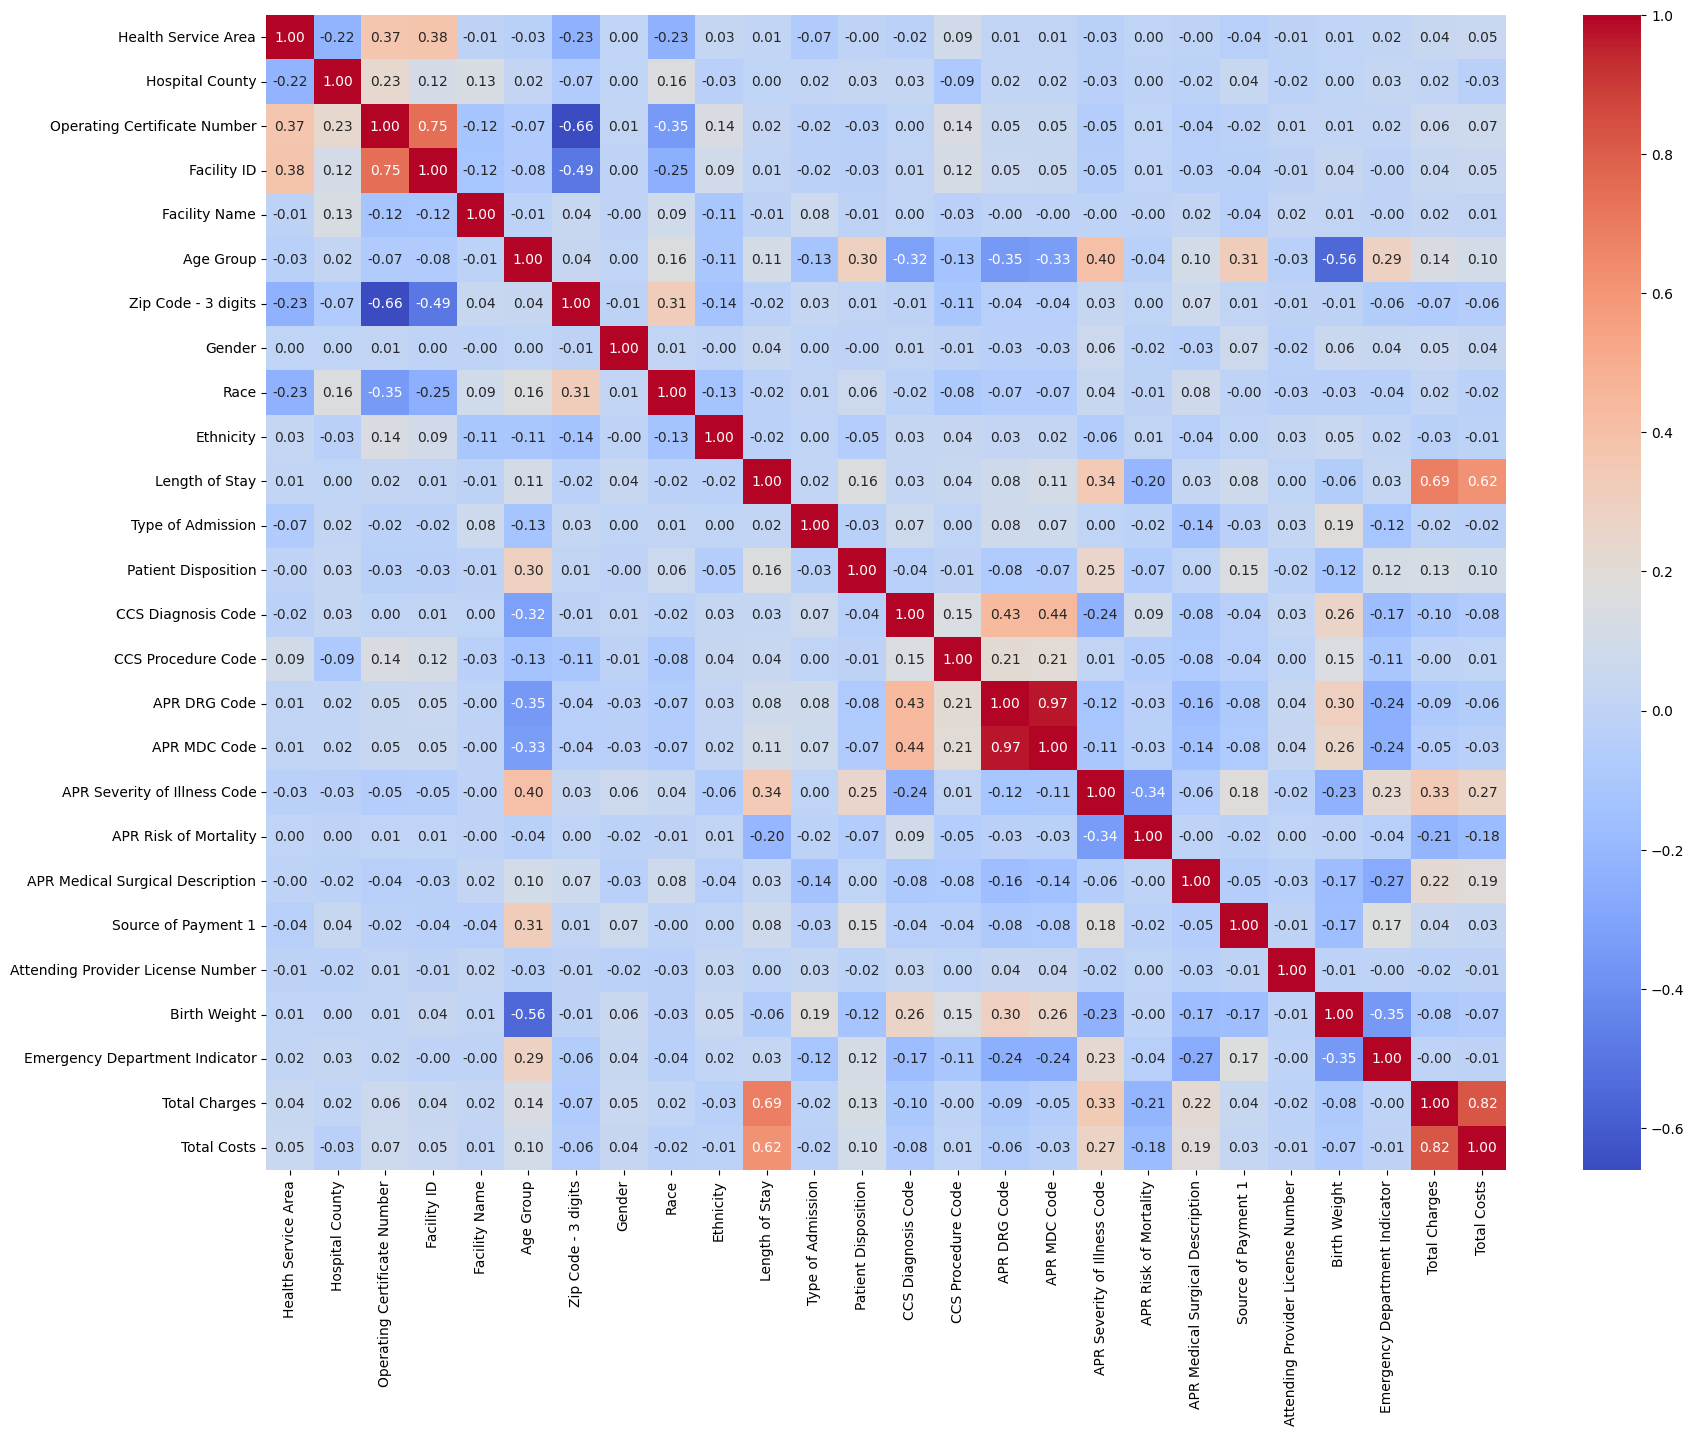

In [37]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt=".2f")

In [38]:
df = df.drop(['APR DRG Code', 'Total Charges', 'Facility ID','Zip Code - 3 digits'], axis=1)

In [39]:
ccs = sorted(df['CCS Diagnosis Code'].unique())

In [40]:
param_logistic = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01, 0.1, 0.3, 0.6, 0.9],
    'solver' : ['saga'],
    'max_iter' : [100, 200,300,400,500],
    'multi_class' : ['multinomial'] 
}

In [41]:
l = [161,179]

Mortality rate based on CCS Diagnosis Code	

Logistic Regression

In [42]:
ccs = sorted(df['CCS Diagnosis Code'].unique())
for i, c in enumerate(ccs):
    if i not in l:
        df_1 = df[df['CCS Diagnosis Code'] == c].copy() 
        df_1.drop(['CCS Diagnosis Code'], axis=1, inplace=True)
    
        X = df_1.drop('APR Risk of Mortality', axis=1)
        y = df_1['APR Risk of Mortality']
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
        sc = MinMaxScaler()
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.transform(X_test)
    
    #logistic_regression = GridSearchCV(LogisticRegression(), param_grid = param_logistic, cv=2, scoring='accuracy')
        logistic_regression = LogisticRegression(solver='saga', multi_class='multinomial', max_iter = 200)
        logistic_regression.fit(X_train_scaled , y_train)

        y_pred = logistic_regression.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
    #print(f'Best Params for County {i} : {logistic_regression.best_params_}')
        print(f'Accuracy : {accuracy}\n\n')

Accuracy : 0.6511627906976745


Accuracy : 0.7305673991472614


Accuracy : 0.6091954022988506


Accuracy : 0.5769230769230769


Accuracy : 0.5496845425867508


Accuracy : 0.631858407079646


Accuracy : 0.7992366412213741


Accuracy : 0.6990049751243781


Accuracy : 0.7536231884057971


Accuracy : 0.7


Accuracy : 0.5981308411214953


Accuracy : 0.5505050505050505


Accuracy : 0.6052009456264775


Accuracy : 0.6338672768878718


Accuracy : 0.6295652173913043


Accuracy : 0.5856236786469344


Accuracy : 0.5681063122923588


Accuracy : 0.5714285714285714


Accuracy : 0.631578947368421


Accuracy : 0.5277777777777778


Accuracy : 0.6452830188679245


Accuracy : 0.7258064516129032


Accuracy : 0.6770833333333334


Accuracy : 0.6832786885245902


Accuracy : 0.7611710323574731


Accuracy : 0.8109243697478992


Accuracy : 0.6550802139037433


Accuracy : 0.5434782608695652


Accuracy : 0.8462823725981621


Accuracy : 0.6470588235294118


Accuracy : 0.7142857142857143


Accuracy : 0.626072041166

KNN Classifier

In [43]:
k = 5 

In [44]:
ccs = sorted(df['CCS Diagnosis Code'].unique())
for i, c in enumerate(ccs):
    if i not in l:
        df_1 = df[df['CCS Diagnosis Code'] == c].copy() 
        df_1.drop(['CCS Diagnosis Code'], axis=1, inplace=True)
    
        X = df_1.drop('APR Risk of Mortality', axis=1)
        y = df_1['APR Risk of Mortality']
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
        sc = MinMaxScaler()
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.transform(X_test)
    
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_scaled, y_train)

        y_pred = knn_classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy (KNN with k={k}): {accuracy}\n\n')


Accuracy (KNN with k=5): 0.6356589147286822


Accuracy (KNN with k=5): 0.6772712364709741


Accuracy (KNN with k=5): 0.5517241379310345


Accuracy (KNN with k=5): 0.44755244755244755


Accuracy (KNN with k=5): 0.4755520504731861


Accuracy (KNN with k=5): 0.4761061946902655


Accuracy (KNN with k=5): 0.7641221374045801


Accuracy (KNN with k=5): 0.5646766169154229


Accuracy (KNN with k=5): 0.7681159420289855


Accuracy (KNN with k=5): 0.7


Accuracy (KNN with k=5): 0.5327102803738317


Accuracy (KNN with k=5): 0.4898989898989899


Accuracy (KNN with k=5): 0.4444444444444444


Accuracy (KNN with k=5): 0.5369946605644547


Accuracy (KNN with k=5): 0.49217391304347824


Accuracy (KNN with k=5): 0.48625792811839325


Accuracy (KNN with k=5): 0.42524916943521596


Accuracy (KNN with k=5): 0.3829787234042553


Accuracy (KNN with k=5): 0.521970062771608


Accuracy (KNN with k=5): 0.4166666666666667


Accuracy (KNN with k=5): 0.5358490566037736


Accuracy (KNN with k=5): 0.5161290322580645




SGD Classifier

In [45]:
sgd_params = {
    'loss': 'log',              # Log loss (logistic regression)
    'penalty': 'l2',            # L2 regularization (ridge)
    'alpha': 0.0001,            # Regularization strength
    'max_iter': 200,            # Maximum number of epochs
    'random_state': 0,          # Random seed for reproducibility
}

In [46]:
ccs = sorted(df['CCS Diagnosis Code'].unique())
for i, c in enumerate(ccs):
    if i not in l:
        df_1 = df[df['CCS Diagnosis Code'] == c].copy() 
        df_1.drop(['CCS Diagnosis Code'], axis=1, inplace=True)
    
        X = df_1.drop('APR Risk of Mortality', axis=1)
        y = df_1['APR Risk of Mortality']
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
        sc = MinMaxScaler()
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.transform(X_test)
    
        logistic_regression = SGDClassifier(**sgd_params)
        logistic_regression.fit(X_train_scaled, y_train)

        y_pred = knn_classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy}\n\n')


Accuracy: 0.5968992248062015


Accuracy: 0.09691702197441784


Accuracy: 0.5057471264367817


Accuracy: 0.25524475524475526


Accuracy: 0.2610410094637224


Accuracy: 0.3185840707964602


Accuracy: 0.7305343511450382


Accuracy: 0.5497512437810945


Accuracy: 0.7391304347826086


Accuracy: 0.85


Accuracy: 0.41682242990654206


Accuracy: 0.26262626262626265


Accuracy: 0.26713947990543735


Accuracy: 0.32570556826849734


Accuracy: 0.4


Accuracy: 0.32346723044397463


Accuracy: 0.2159468438538206


Accuracy: 0.24012158054711247


Accuracy: 0.2930951231289232


Accuracy: 0.4444444444444444


Accuracy: 0.5169811320754717


Accuracy: 0.532258064516129


Accuracy: 0.4791666666666667


Accuracy: 0.6301639344262295


Accuracy: 0.7010785824345146


Accuracy: 0.7058823529411765


Accuracy: 0.21657754010695188


Accuracy: 0.4891304347826087


Accuracy: 0.7794486215538847


Accuracy: 0.5882352941176471


Accuracy: 0.6428571428571429


Accuracy: 0.3876500857632933


Accuracy: 0.5993589743589743


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2614735 entries, 0 to 2617245
Data columns (total 22 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                int64  
 1   Hospital County                    int64  
 2   Operating Certificate Number       float64
 3   Facility Name                      int64  
 4   Age Group                          int64  
 5   Gender                             int64  
 6   Race                               int64  
 7   Ethnicity                          int64  
 8   Length of Stay                     int64  
 9   Type of Admission                  int64  
 10  Patient Disposition                int64  
 11  CCS Diagnosis Code                 int64  
 12  CCS Procedure Code                 float64
 13  APR MDC Code                       int64  
 14  APR Severity of Illness Code       int64  
 15  APR Risk of Mortality              int64  
 16  APR Medical Surgical De

In [48]:
df = df[df['Birth Weight'] != 0]

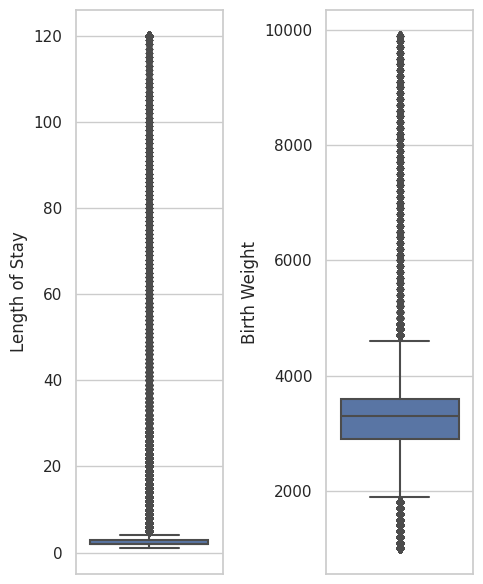

In [49]:
sns.set(style="whitegrid")  # Set the style for the plots
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Create subplots for each boxplot
plt.subplot(1, 4, 1)  # 1 row, 4 columns, first plot
sns.boxplot(data=df, y = 'Length of Stay')

plt.subplot(1, 4, 2)  # 1 row, 4 columns, first plot
sns.boxplot(data=df, y = 'Birth Weight')



plt.tight_layout()  # Adjust subplot layout for a clean appearance
plt.show()

I found with the help of Box plot that there are outliers in 'Length of Stay'and'Birth Weight'

We also find that there were so many outliers present data so we chosed classification models which are less sensitive to outliers

In [50]:
#cols_to_process = ['Length of Stay','Birth Weight']

In [51]:
'''for col in cols_to_process:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]'''

'for col in cols_to_process:\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]'

There are no unique values left in 'Type of Admission',' APR Risk of Mortality	', 'APR Medical Surgical Description' and 'Birth Weight'	